# Movie Recommender System 

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

## Data Preparation

__Load the Dataset__

In [199]:
movies = pd.read_csv('Netflix_Titles.csv')

In [200]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious


In [201]:
movies.index

RangeIndex(start=0, stop=922, step=1)

In [202]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'mode'],
      dtype='object')

### Data Visualization of the dataset

__Analyse Movie Mood__

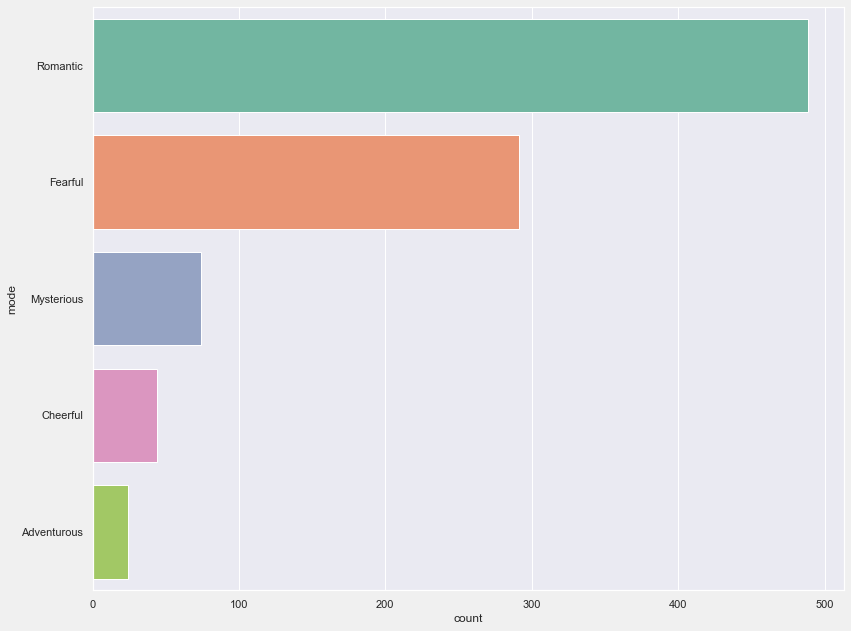

In [203]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='mode', data=movies, palette="Set2", order=movies['mode'].value_counts().index[0:10])

__Analyse Movie Duration__

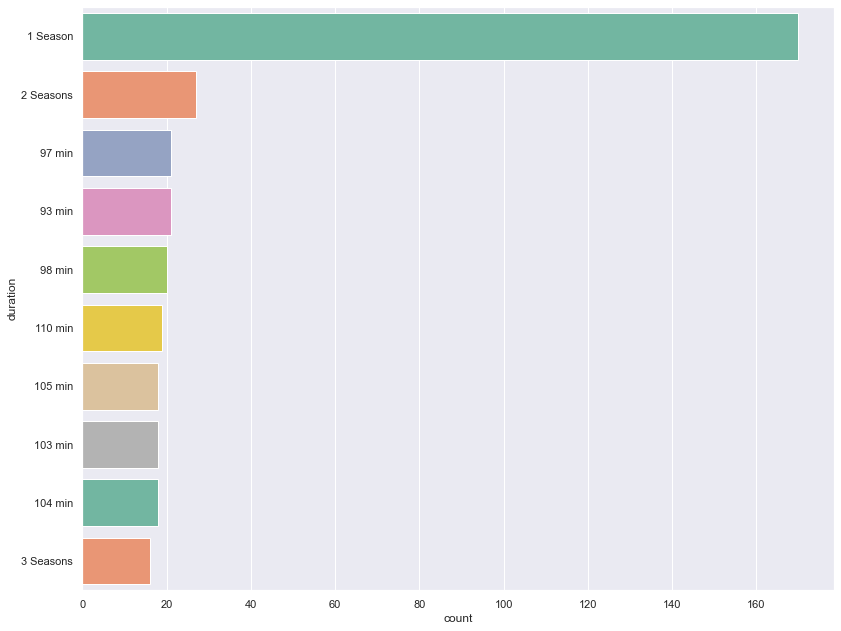

In [204]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='duration', data=movies, palette="Set2", order=movies['duration'].value_counts().index[0:10])

## Data Mining

In [205]:
moodList = []
for index, row in movies.iterrows():
    moods = row["mode"]
    
    if moods not in moodList:
        moodList.append(moods)

moodList[:922] #now we have a list with unique genres

['Fearful', 'Adventurous', 'Mysterious', 'Romantic', 'Cheerful']

__One Hot Encoding for easier classification for mood__

In [206]:
#convert the mood in moodList to binary values to classify
def binary(mood_list):
    binaryList = []
    
    for mood in moodList:
        if mood in mood_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList


In [207]:
#apply list of unique binary value of each mood to comlum 'mood_bin'
movies['mood_bin'] = movies['mode'].apply(lambda x: binary(x))
movies['mood_bin'].head()

0    [1, 0, 0, 0, 0]
1    [0, 1, 0, 0, 0]
2    [1, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0]
4    [0, 0, 1, 0, 0]
Name: mood_bin, dtype: object

In [208]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,mood_bin
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful,"[1, 0, 0, 0, 0]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous,"[0, 1, 0, 0, 0]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful,"[1, 0, 0, 0, 0]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful,"[1, 0, 0, 0, 0]"
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious,"[0, 0, 1, 0, 0]"


In [209]:
durationList = []
for index, row in movies.iterrows():
    durations = row["duration"]
    
    if durations not in durationList:
        durationList.append(durations)

durationList[:922] #now we have a list with unique genres

['4 Seasons',
 '93 min',
 '78 min',
 '80 min',
 '1 Season',
 '118 min',
 '143 min',
 '103 min',
 '89 min',
 '91 min',
 '149 min',
 '144 min',
 '124 min',
 '110 min',
 '128 min',
 '99 min',
 '95 min',
 '90 min',
 '102 min',
 '104 min',
 '105 min',
 '56 min',
 '125 min',
 '119 min',
 '81 min',
 '97 min',
 '106 min',
 '107 min',
 '87 min',
 '135 min',
 '121 min',
 '114 min',
 '120 min',
 '96 min',
 '148 min',
 '122 min',
 '94 min',
 '101 min',
 '92 min',
 '85 min',
 '117 min',
 '130 min',
 '133 min',
 '2 Seasons',
 '153 min',
 '79 min',
 '112 min',
 '163 min',
 '9 Seasons',
 '171 min',
 '127 min',
 '100 min',
 '3 Seasons',
 '73 min',
 '126 min',
 '88 min',
 '132 min',
 '98 min',
 '115 min',
 '113 min',
 '108 min',
 '151 min',
 '129 min',
 '84 min',
 '5 Seasons',
 '116 min',
 '77 min',
 '166 min',
 '86 min',
 '12 Seasons',
 '137 min',
 '8 Seasons',
 '145 min',
 '109 min',
 '200 min',
 '134 min',
 '162 min',
 '141 min',
 '123 min',
 '74 min',
 '111 min',
 '154 min',
 '170 min',
 '6 Seasons'

__One Hot Encoding for easier classification for duration__

In [210]:
#convert the mood in durationList to binary values to classify
def binary(duration_list):
    binaryList = []
    
    for duration in durationList:
        if duration in duration_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [211]:
#apply list of unique binary value of each duration to comlum 'duration_bin'
movies['duration_bin'] = movies['duration'].apply(lambda x: binary(x))
movies['duration_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: duration_bin, dtype: object

In [212]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,mood_bin,duration_bin
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful,"[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous,"[0, 1, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful,"[1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful,"[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


__Cosine Similarity to find similar movies__

In [234]:
from scipy import spatial
movieList = []
recList = []
totalSimilarity = []

def recommend_movie():
    movieList.clear()
    recList.clear()
    mood = input('Enter your desired mood: ')
    duration = input('Enter your desired duration: ')
    desired_mood = desired_mood_bin(mood) #get binary value of desired mood
    desired_duration = desired_duration_bin(duration) #get binary value of desired duration
    
    if desired_mood == "no relavent mood or duration" or desired_duration == "no relavent mood or duration":
        print("No relavent mood or duration in database.")
    else:
        #if total cosine similarity is 2, means each feature(mood and duration) is cos(0)=1 meaning 100% similarity, add to the movieList[] 
        movie_list_recommendation(desired_mood,desired_duration,2)
        if len(movieList) > 0:
            print("The following are movies similar to your desired mood and duration: ")
            print(movieList)
        elif len(movieList) == 0:
        #if total cosine similarity is 1, means total or each feature(mood and duration) has at least 50% similarity
            print("The following are movies similar to your desired mood and duration: ")
            movie_list_recommendation(desired_mood,desired_duration, 1)
            print(movieList)
            

def movie_list_recommendation(desired_mood, desired_duration, cosine_similarity_value):
    for index, row in movies.iterrows():
        movie_mood = row['mood_bin']
        movie_duration = row['duration_bin']
        
        moodCosineSimilarity = -(spatial.distance.cosine(desired_mood,movie_mood) - 1) #calculate cosine similarity between desired mood and corresponding mood        
        
        durationCosineSimilarity = -(spatial.distance.cosine(desired_duration, movie_duration) -1) #calculate cosine similarity between desired duration and corresponding duration
        
        totalCosineSimilarity = moodCosineSimilarity + durationCosineSimilarity #calculate total distance
        totalSimilarity.append(totalCosineSimilarity)
        
        if totalCosineSimilarity == cosine_similarity_value:
            movieList.append(row['title'])
            recList.append([row['title'],row['mode'],row['duration']])
    
    return movieList

    
def desired_mood_bin(mood):
    for index, row in movies.iterrows():
        moods = row["mode"]
        if mood == moods:
            return row['mood_bin']
            return "no relavent mood or duration"
        
def desired_duration_bin(duration):
    for index, row in movies.iterrows():
        durations = row["duration"]
        if duration == durations:
            return row['duration_bin']
    

## Content Based Movie Recommender System

__Content-based system that filters data based on user preference.__

In [237]:
recommend_movie()

Enter your desired mood: Romantic
Enter your desired duration: 110 min
The following are movies similar to your desired mood and duration: 
['Blood Money', 'Bride For Rent', 'Brother in Love', 'Maniyarayile Ashokan', 'Melle', "Okafor's Law", 'Romantik Komedi', "Tarek's Situation", 'The Lighthouse of the Orcas', 'Up in the Air', "What's Up With Love?"]


### Data Visualization of cosine similarity

__Cosine measure results using cosine similarities between Mood and Duration__

In [247]:
print(totalSimilarity)
from numpy import *

random = np.random.choice(totalSimilarity, 25, replace=False)
sim_index = array([random])

[-0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 2.0, 1.0, 1.0, -0.0, 1.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, 1.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0,

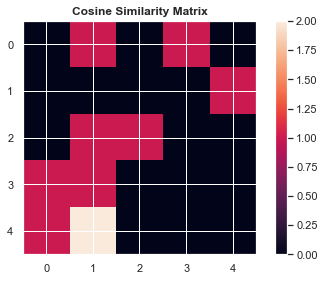

In [248]:
import matplotlib.pyplot as plt

plt.title('Cosine Similarity Matrix', 
                                     fontweight ="bold")
plt.imshow(sim_index.reshape((5,5)))
plt.colorbar()

## Result Analysis

In [238]:
df = pd.DataFrame(recList, columns =['Movie Title', 'Mood', 'Movie Duration'])
  
df.head(10).style.hide_index()

Movie Title,Mood,Movie Duration
Blood Money,Romantic,110 min
Bride For Rent,Romantic,110 min
Brother in Love,Romantic,110 min
Maniyarayile Ashokan,Romantic,110 min
Melle,Romantic,110 min
Okafor's Law,Romantic,110 min
Romantik Komedi,Romantic,110 min
Tarek's Situation,Romantic,110 min
The Lighthouse of the Orcas,Romantic,110 min
Up in the Air,Romantic,110 min


The movie recommender system will only recommend movies based on user inputs of their preferred mood and movie duration. As shown as the table above, it shows the top recommended movies by the system based on the user input.